## Aloha!!

Today we will explore Indian startup funding data and try to gain information about startup investment market. This will help us see wheather India is providing healthy market for startup culture and their growth.

Data can be taken from (https://www.kaggle.com/sudalairajkumar/indian-startup-funding) or can be scraped from (https://trak.in/india-startup-funding-investment-2015/) to get latest data.


#### We will try to explore the data by answering below questions: 

A. How does the funding ecosystem change with time?

B. Do cities play a major role in funding?

C. Which industries are favored by investors for funding?

D. Who are the important investors in the Indian Ecosystem?

E. How much funds does startups generally get in India?

## Importing required libraries

**1. Pandas:** For loading data from csv into dataframe

**2. datetime:** For converting date stored in string formate into datetime format to do analysis based on date, month, quarter, year

**3. re:** For extrarcting value from string using pattern

**4. matplotlib and seaborn:** For data visualization

**5. requests:** For sending http request and using url

**6. BeautifulSoup:** For scrapping html pages and grabbing the data

In [1]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
start_url = "https://trak.in/india-startup-funding-investment-2015/"
html_response = requests.get(start_url)
html_response.status_code # code 200 means connecition was sucessful and it is now active

200

In [3]:
soup = BeautifulSoup(html_response.content, 'html.parser')
#print(soup.prettify())

In [4]:
more_data_urls = [start_url]

for h3_tag in soup.find_all(name="h3"):
    more_data_urls.append(h3_tag.find(name='a').get('href'))

more_data_urls = set(more_data_urls)
#more_data_urls

In [5]:
new_row_list = []
column_name = ['Sr. No.', 'Date (dd/mm/yyyy)', 'Startup Name', 'Industry/ Vertical', 'Sub-Vertical', 'City / Location', 'Investors’ Name', 'Investment Type', 'Amount (in USD)']

urls_count = 1
for url in more_data_urls:
    html_response = requests.get(url)
    html_response.status_code
    soup = BeautifulSoup(html_response.content, 'html.parser')
    
    class_list = []
    for element in soup.find_all(class_=True):
        class_list.extend(element["class"])
    class_list = [cls for cls in class_list if 'tablepress-id-' in cls] 
    
    if len(class_list) < 1:
        skip_first_row = True
        class_list.append(None)
        for class_ in class_list:
            tbl=soup.find(name='table') #, class_=class_)

            n_rows = 0
            for tr in tbl.find_all('tr'):
                if skip_first_row == True:
                    skip_first_row = False
                    continue
                new_row = {}
                for col_id, td in enumerate(tr.find_all('td')):
                    if col_id < len(column_name):
                        new_row[column_name[col_id]] = td.text
                if not new_row == {}:
                    n_rows += 1
                    new_row_list.append(new_row)
            #print("class_list-old:", class_, len(new_row_list), n_rows, url)
    else:
        for class_ in class_list:
            tbl=soup.find(name='table', class_=class_)

            n_rows = 0
            for tr in tbl.find_all('tr'):
                new_row = {}
                for col_id, td in enumerate(tr.find_all('td')):
                    if col_id < len(column_name):
                        new_row[column_name[col_id]] = td.text
                if not new_row == {}:
                    n_rows += 1
                    new_row_list.append(new_row)
            #print("class_list-new :", class_, len(new_row_list), n_rows, url)

data = pd.DataFrame(new_row_list, columns=column_name)
print("Data shape :", data.shape)

Data shape : (3308, 9)


In [6]:
data

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment Type,Amount (in USD)
0,1,02/02/2015,Faaya,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
1,2,02/02/2015,InstaBounce,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
2,3,02/02/2015,Chloroplast Foods,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
3,4,02/02/2015,Dealwithus,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
4,5,02/02/2015,CleverSharks,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3303,76,31/5/2016,CCavenue,Consumer Internet,Payment Gateway,Mumbai,NSI Infinium Global Pvt. Ltd,Private Equity,"8,900,000"
3304,77,31/5/2016,1mg,eCommerce,Online Pharmacy,Gurgaon,HBM Healthcare Investments,Private Equity,N/A
3305,78,31/5/2016,Tpot,Food & Beverage,QSR Chain,Gurgaon,Ashish Gupta,Seed Funding,N/A
3306,79,31/5/2016,MachaDalo,Consumer Internet,Hyperlocal Advertising Platform,Mumbai,Undisclosed Investors,Seed Funding,"175,000"


### Before starting EDA we need to chec k if the data is clean

**1.** Making Column names easy to read and access

**2.** Converting Date, Amount columns in datetime and float formate for processing

**3.** Checking and cleaning Null, incorrect values in columns

In [7]:
data_copy = data.copy()
data.columns

Index(['Sr. No.', 'Date (dd/mm/yyyy)', 'Startup Name', 'Industry/ Vertical',
       'Sub-Vertical', 'City / Location', 'Investors’ Name', 'Investment Type',
       'Amount (in USD)'],
      dtype='object')

In [8]:
data = data_copy
data = data.dropna(how='all')
data.shape

(3308, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3308 entries, 0 to 3307
Data columns (total 9 columns):
Sr. No.               3308 non-null object
Date (dd/mm/yyyy)     3308 non-null object
Startup Name          3308 non-null object
Industry/ Vertical    3308 non-null object
Sub-Vertical          3308 non-null object
City / Location       3308 non-null object
Investors’ Name       3308 non-null object
Investment Type       3133 non-null object
Amount (in USD)       3130 non-null object
dtypes: object(9)
memory usage: 258.4+ KB


In [10]:
# 1. The data types of data in few columns are not correct to do statistical analysis, hence it needs to be fixed using dtype, astype()

data.rename(columns={"Date (dd/mm/yyyy)": "Date", 'Startup Name': 'StartupName', "Industry/ Vertical":'IndustryVertical', "Sub-Vertical": 'SubVertical', "City / Location": 'CityLocation', "Investors’ Name": 'InvestorsName','Investment Type':'InvestmentType', 'Amount (in USD)':'AmountUSD'}, inplace=True)
data.head()

,Sr. No.,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountUSD
0,1,02/02/2015,Faaya,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
1,2,02/02/2015,InstaBounce,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
2,3,02/02/2015,Chloroplast Foods,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
3,4,02/02/2015,Dealwithus,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN
4,5,02/02/2015,CleverSharks,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN


In [11]:
# 2. Few values 'Date' column are not in correcdt date format checking those rows

del_index=data[~data.Date.str.contains('.')].index
data.drop(inplace=True, index=del_index)
data = data.reindex()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3271 entries, 0 to 3306
Data columns (total 9 columns):
Sr. No.             3271 non-null object
Date                3271 non-null object
StartupName         3271 non-null object
IndustryVertical    3271 non-null object
SubVertical         3271 non-null object
CityLocation        3271 non-null object
InvestorsName       3271 non-null object
InvestmentType      3099 non-null object
AmountUSD           3099 non-null object
dtypes: object(9)
memory usage: 255.5+ KB


In [12]:
# 3. Correcting values Date column

data.loc[data['Date']=="01/07/015", 'Date'] = "01/07/2015"
data.loc[data['Date']=="Â 10/7/2015", 'Date'] = "10/07/2015"
data.loc[data['Date']=="05/072018", 'Date'] = "05/07/2018"
data.loc[data['Date']=="12/05.2015", 'Date'] = "12/05/2015"
data.loc[data['Date']=="15/01.2015", 'Date'] = "15/01/2015"
data.loc[data['Date']=="22/01//2015", 'Date'] = "22/01/2015"
data.loc[data['Date']=="13/04.2015", 'Date'] = "13/04/2015"

In [13]:
# 4. Converting 'Date' column from string to Date format to separate Year, month, also to display charts. 

data['Date']= pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3271 entries, 0 to 3306
Data columns (total 9 columns):
Sr. No.             3271 non-null object
Date                3271 non-null datetime64[ns]
StartupName         3271 non-null object
IndustryVertical    3271 non-null object
SubVertical         3271 non-null object
CityLocation        3271 non-null object
InvestorsName       3271 non-null object
InvestmentType      3099 non-null object
AmountUSD           3099 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 255.5+ KB


In [14]:
# 5. Some values for 'AmountUSD' are present in 'InvestmentType' column

data['NewAmountUSD'] = data['AmountUSD']
data.loc[((data['AmountUSD'].str.contains('[a-zA-Z]')) | (data['AmountUSD'].isin(['nan','']))) & (data['InvestmentType'].str.contains('[0-9]')), 'NewAmountUSD'] = data['InvestmentType']
data.iloc[347:355, :]

#data.loc[(~ data['InvestmentType'].isin(['N/A', 'NaN'])) & (data['InvestmentType'].str.contains(','))]

,Sr. No.,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountUSD,NewAmountUSD
350,34,2017-10-18,LenDen Club,Consumer Internet,Online peer-to-peer lending platform,Mumbai,Undisclosed Investor,Seed Funding,"500,000","500,000"
351,35,2017-10-23,Toppr,Consumer Internet,Mobile based learning app,Mumbai,"SAIF Partners, Helion Ventures, FIL Capital Ma...",Private Equity,"7,000,000","7,000,000"
352,36,2017-10-23,RAW Pressery,Food & Beverage,Cold pressed Juice maker,Mumbai,"DSG Consumer Partners, Sequoia Capital, Saama ...",Private Equity,"6,000,000","6,000,000"
353,37,2017-10-23,Cashe,Consumer Internet,app-only lending platform,Mumbai,IFMR Capital,Debt Funding,"3,100,000","3,100,000"
354,38,2017-10-23,Park Easy,Consumer Internet,Machine learning based parking discovery,Kolkata,Rockstart Accelerator,Seed Funding,"118,000","118,000"
355,39,2017-10-24,TagBox,Technology,Cold Chain monitoring solution,Bangalore,"Indian Angel network, IAN Fund",Seed Funding,N/A,N/A
356,40,2017-10-24,FYRE,Food & Beverage,Herbal energy shot maker,Mumbai,Venture Catalysts,Seed Funding,"500,000","500,000"
357,41,2017-10-24,ZipLoan,Consumer Internet,SME lending platform,New Delhi,"Matrix Partners India, WaterBridge Ventures, W...",Private Equity,"3,000,000","3,000,000"


In [15]:
# 6. Converting datatype of values in 'AmountUSD' column from string to float. Marking Undisclosed values to 'nan' and then converting into float type
# Also imputing blank values in 'Amount' column by minimum funding amount

data.loc[data['NewAmountUSD'].isin(['undisclosed', 'unknown', 'Undisclosed', 'N/A']), 'NewAmountUSD'] = 'nan'
data['NewAmountUSD'] = data['NewAmountUSD'].astype(str)
data['NewAmountUSD'] = data['NewAmountUSD'].apply(lambda x : re.sub("[^0-9]", "", x))
data.loc[data['NewAmountUSD']=='', 'NewAmountUSD'] = 0 #'nan' # replace with average of funding provided that months 
data['NewAmountUSD'] = data['NewAmountUSD'].astype(float)
data.loc[data['NewAmountUSD']==0.0, 'NewAmountUSD'] = data['NewAmountUSD'].min()
data.head()

,Sr. No.,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountUSD,NewAmountUSD
0,1,2015-02-02,Faaya,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN,0.0
1,2,2015-02-02,InstaBounce,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN,0.0
2,3,2015-02-02,Chloroplast Foods,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN,0.0
3,4,2015-02-02,Dealwithus,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN,0.0
4,5,2015-02-02,CleverSharks,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,NaN,0.0


In [16]:
# 7. Correcting values in 'CityLocation' column

data.loc[data['CityLocation'] == 'Bangalore', 'CityLocation'] = 'Bengaluru'
data.loc[data['CityLocation'] == 'Gurgaon', 'CityLocation'] = 'Gurugram'
data.loc[data['CityLocation'] == 'New Delhi', 'CityLocation'] = 'Delhi'

In [17]:
# 8. Decomposing Date into Year, month, YearMonth to do analysis by quarter

data['YearMonth'] = data['Date'].map(lambda x: 100*x.year + x.month)
data['Year'] = data['Date'].map(lambda x: x.year)
data['Month'] = data['Date'].map(lambda x: x.month)

In [18]:
# 9. Correcting values in 'InvestmentType' column

data.loc[(data['InvestmentType'].isin(['', 'N/A', 'Undisclosed investors', 'Undisclosed Investor', 'Undisclosed Investors', \
                                     'Undisclosed', 'undisclosed investors', 'Undisclosed investor', \
                                     'Undisclosed multiple investors', 'Undisclosed angel investors', \
                                     '3 undisclosed investors'])) | (data['InvestmentType'].str.contains('[0-9]')), 'InvestmentType'] = 'Undisclosed Investors'

In [19]:
# 10. Correcting values in 'InvestorsName' column

data.loc[data['InvestorsName'].isin(['',' ', "N/A"]), 'InvestorsName'] = "Undisclosed Investors"

In [20]:
# 11. removing rows not having startup name

data.drop(index=data[data['StartupName']==''].index, inplace=True)

## Starting EDA now!

In [21]:
startup_data = data[['Date', 'Year', 'Month', 'StartupName', 'IndustryVertical', 'SubVertical', 'CityLocation', 'InvestorsName', 'InvestmentType', 'NewAmountUSD']]
startup_data['Date'] = pd.to_datetime(startup_data.Date)
startup_data.set_index('Date', inplace=True)
startup_data.head()

,Year,Month,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,NewAmountUSD
Date,,,,,,,,,
2015-02-02,2015,2,Faaya,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,0.0
2015-02-02,2015,2,InstaBounce,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,0.0
2015-02-02,2015,2,Chloroplast Foods,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,0.0
2015-02-02,2015,2,Dealwithus,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,0.0
2015-02-02,2015,2,CleverSharks,Group of Angel Investors,Seed\nFunding,"16,600",At the 10 minute million event,NaN,0.0


In [22]:
startup_data.to_csv("startup_funding_data.csv")

## A. How does the funding ecosystem change with time?

In [23]:
funding_count_yr = pd.DataFrame(startup_data['Year'].value_counts())
funding_count_yr.rename(columns={"Year":"Number of Fundings"}, inplace=True)
funding_count_yr

,Number of Fundings
2016,993
2015,936
2017,687
2018,529
2019,86
2020,24


In [24]:
funding_count_qtr = pd.DataFrame(data=startup_data['Year'].resample('QS').count())
funding_count_qtr.rename(columns={'Year':'Number of Fundings(Qtr)'}, inplace=True)
funding_count_qtr['QtrMonth'] = ['2015-1', '2015-4', '2015-7', '2015-10', '2016-1', '2016-4', '2016-7', '2016-10', '2017-1', '2017-4', '2017-7', '2017-10', '2018-1', '2018-4', '2018-7', '2018-10', '2019-1', '2019-4', '2019-7', '2019-10', '2020-1', '2020-4', '2020-7', '2020-10']
funding_count_qtr.head()

,Number of Fundings(Qtr),QtrMonth
Date,,
2015-01-01,209,2015-1
2015-04-01,215,2015-4
2015-07-01,275,2015-7
2015-10-01,237,2015-10
2016-01-01,251,2016-1


In [25]:
funding_total_yr = pd.DataFrame(startup_data.groupby(by=['Year'])['NewAmountUSD'].sum())
funding_total_yr.rename(columns={"NewAmountUSD":"Total Funding(USD-Bn)"}, inplace=True)
funding_total_yr = funding_total_yr.sort_values(by='Total Funding(USD-Bn)', ascending=False)
funding_total_yr

,Total Funding(USD-Bn)
Year,
2019,1.104933e+10
2018,1.053220e+10
2017,1.042931e+10
2015,7.441213e+09
2016,3.828089e+09
2020,9.403323e+08


In [26]:
funding_total_qtr = pd.DataFrame(data=startup_data['NewAmountUSD'].resample('QS').sum())
funding_total_qtr.rename(columns={'NewAmountUSD':'Total Fundings(Qtr USD-Bn)'}, inplace=True)
funding_total_qtr['QtrMonth'] = ['2015-1', '2015-4', '2015-7', '2015-10', '2016-1', '2016-4', '2016-7', '2016-10', '2017-1', '2017-4', '2017-7', '2017-10', '2018-1', '2018-4', '2018-7', '2018-10', '2019-1', '2019-4', '2019-7', '2019-10', '2020-1', '2020-4', '2020-7', '2020-10']
funding_total_qtr.head()

,Total Fundings(Qtr USD-Bn),QtrMonth
Date,,
2015-01-01,1.061858e+09,2015-1
2015-04-01,1.165205e+09,2015-4
2015-07-01,3.700103e+09,2015-7
2015-10-01,1.514047e+09,2015-10
2016-01-01,1.104478e+09,2016-1


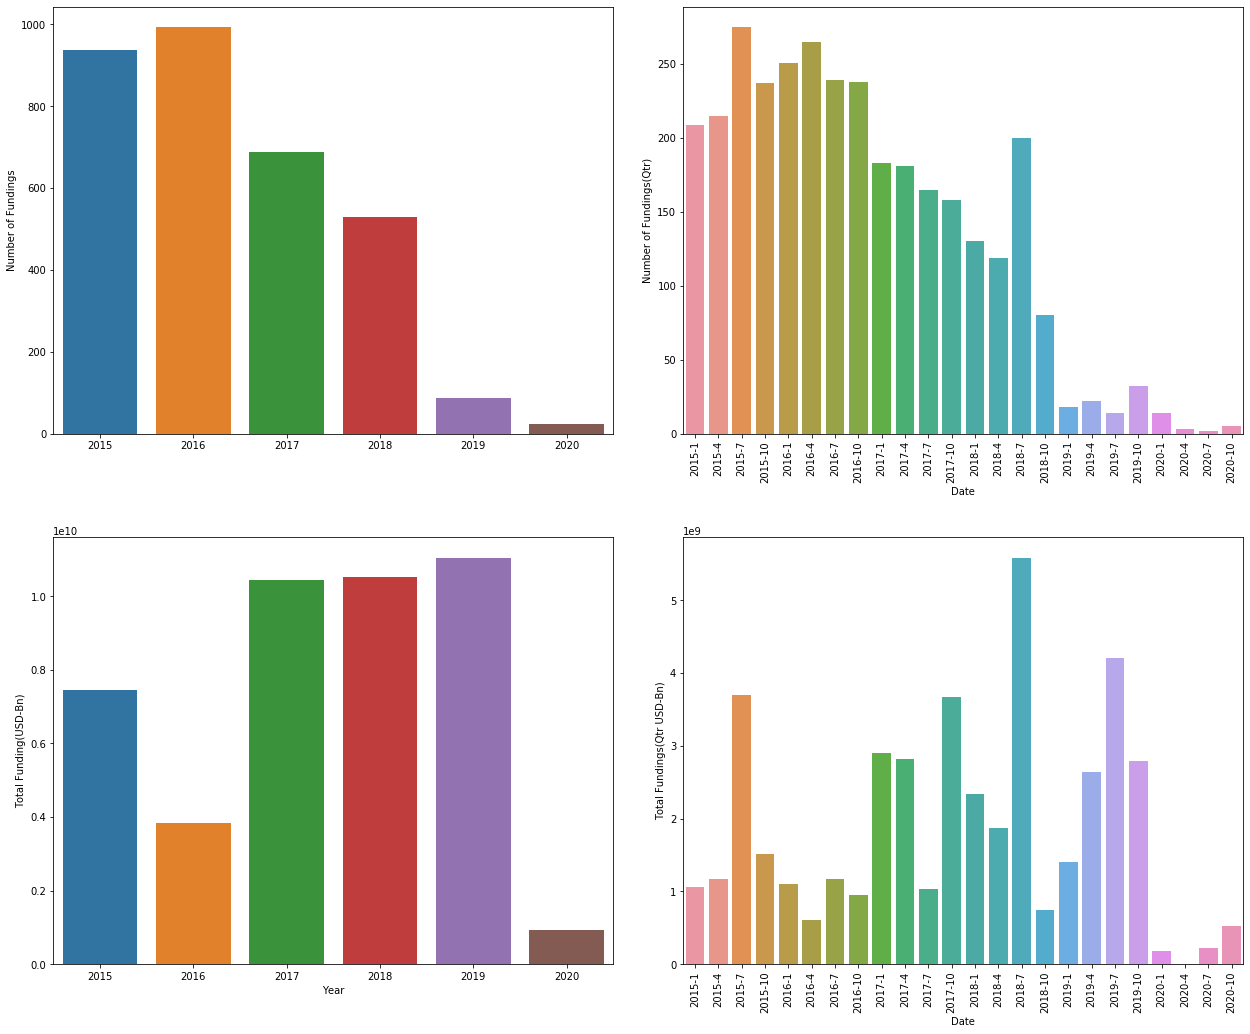

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,15))

sns.barplot(x=funding_count_yr.index, y=funding_count_yr['Number of Fundings'], data=funding_count_yr, ax=axes[0,0], orient='v')
sns.barplot(x=funding_count_qtr.index, y=funding_count_qtr['Number of Fundings(Qtr)'], data=funding_count_qtr, ax=axes[0,1], orient='v').set_xticklabels(rotation=90, labels=funding_total_qtr['QtrMonth'])

sns.barplot(x=funding_total_yr.index, y=funding_total_yr['Total Funding(USD-Bn)'], data=funding_total_yr, ax=axes[1,0], orient='v')
sns.barplot(x=funding_total_qtr.index, y=funding_total_qtr['Total Fundings(Qtr USD-Bn)'], data=funding_total_qtr, ax=axes[1,1], orient='v').set_xticklabels(rotation=90, labels=funding_total_qtr['QtrMonth'])

fig.tight_layout(pad=3)
plt.show()

## Exploring number and total fundings received by indian startups:
From above exploration it seems that the *number of fundings* made in 2016 was highest(initial quarters in 2016) followed by 2015 but it gradually started decreasing.
-> Lot of startups got the funding in the year 2016 and 2015, this might be due to Startup India, an initiative of the Government of India declared in August 2015. -> Giving a boost to new entrepreneur getting funds and transforming ideas into reality. Year 2015 and 2016 has spread positivity in indian startup investor market!!

### Getting highest number of fundings in 2016 does not mean the total funds raised was highest in 2016 (which was only 0.38 Billion).
-> The Total amount invested in startups was highest in 2015(majorly 3rd Quarter of 2015 when policy was declared by the Gov.) with 1.6 billion USD followed by in 2019 ~ 1.2 billion USD.

### It seems number of fundings slowed down after 2016 (one of the reason can be Demonatization which affected many industries and markets). 
-> We have now entered in 2020 with lowest funding raised compared to past data. There seems some issue with domestic investors, why fundings are going down?

### The best is yet to come for the investors and the startups looking for fundings.. Hope upcoming days and policies are positive to help them to build amazing projects..


## B. Do cities play a major role in funding?
We all know that the Bangluru is startup hub of India, lets see if the data is supporting the same or an other city is emerging in this race?

In [28]:
fundings_count_city = pd.DataFrame(startup_data['CityLocation'].value_counts().sort_values(ascending=False)[:10])
fundings_count_city.rename(columns={'CityLocation':'Number of Fundings by City'}, inplace=True)
fundings_count_city.head()

,Number of Fundings by City
Bengaluru,725
Mumbai,441
Delhi,330
Gurugram,293
Pune,94


In [29]:
funding_total_city = pd.DataFrame(startup_data.groupby('CityLocation')['NewAmountUSD'].sum()).sort_values(by="NewAmountUSD", ascending=False)[:10]
funding_total_city.rename(columns={'NewAmountUSD':'Total Funding by City(USD-Bn)'}, inplace=True)
funding_total_city.head()

,Total Funding by City(USD-Bn)
CityLocation,
Bengaluru,1.852340e+10
Mumbai,6.953288e+09
Gurugram,3.766303e+09
Delhi,1.543057e+09
Noida,1.248066e+09


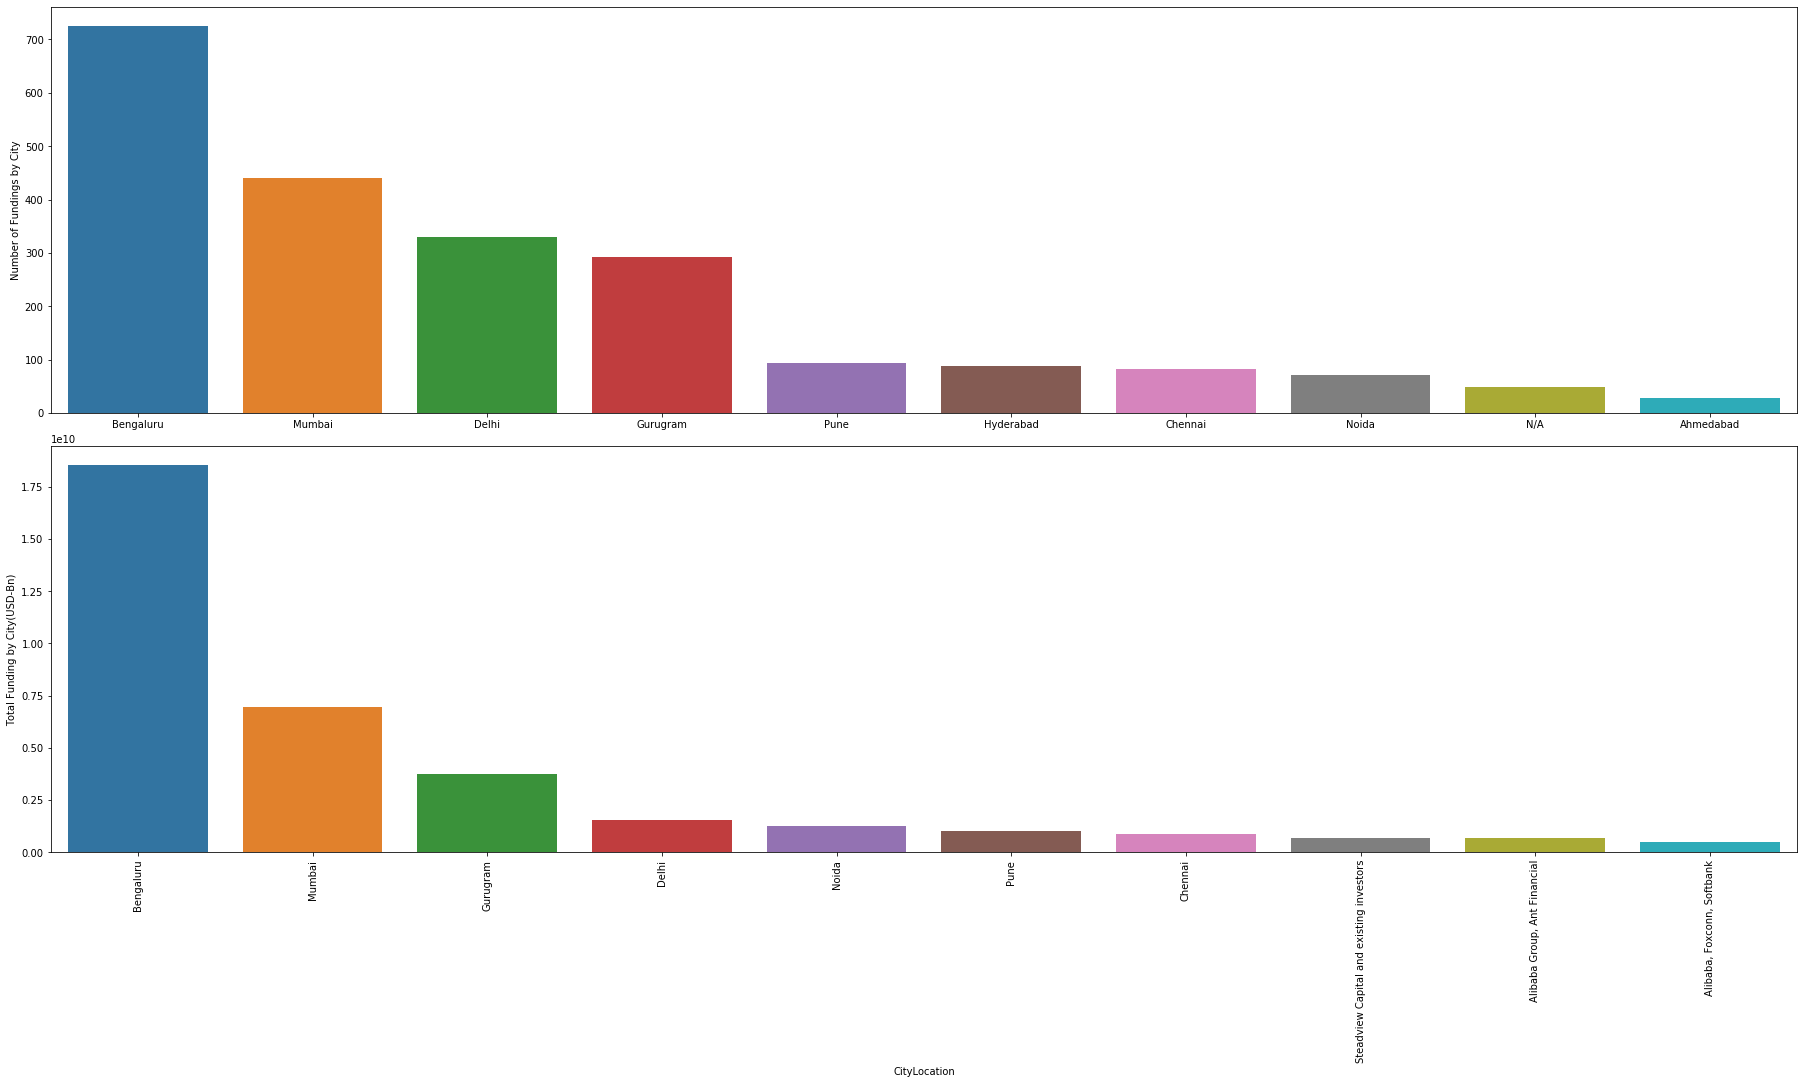

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=fundings_count_city.index, y=fundings_count_city['Number of Fundings by City'], data=fundings_count_city, ax=axes[0])
sns.barplot(x=funding_total_city.index, y=funding_total_city['Total Funding by City(USD-Bn)'], data=funding_total_city, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_city.index)

fig.tight_layout(pad=0.5)
plt.show()

### We were correct, Bangaluru it is.. the Sillicon Valley of India.
-> There is a saying that anyone who comes to Mumbai with willpower will find his/her way to earn and live here. It seems true for statups in Bangaluru as well, the city is providing good atmospheare and is encoraging budding ideas to come to reality.

-> Bangaluru has major share of its own by helping Indian economy i.e. by providing employment.

-> Total fundings received by Bangaluru is highest at about 2.19 Billion and It drastically drops with Mumbai and NCR regions(Delhi, Gurgaon and Noida) followed by Chennai, Pune, Hydrabad.

### This explains why is their salary difference in Bangaluru and other cities!! :) Bangaluru take me.. mold me.. teach me.. let me exlore your awsomeness.. :P

## C. Which industries are favored by investors for funding?

In [31]:
fundings_count_industry = pd.DataFrame(startup_data['IndustryVertical'].value_counts().sort_values(ascending=False))[:10]
fundings_count_industry.rename(columns={'IndustryVertical':'Number of Fundings by Industry'}, inplace=True)
fundings_count_industry.head()

,Number of Fundings by Industry
Consumer Internet,1051
Technology,507
eCommerce,186
Healthcare,90
Finance,78


In [32]:
funding_total_industry = pd.DataFrame(startup_data.groupby('IndustryVertical')['NewAmountUSD'].sum()).sort_values(by="NewAmountUSD", ascending=False)[:10]
funding_total_industry.rename(columns={'NewAmountUSD':'Total Funding by Industry(USD-Bn)'}, inplace=True)
funding_total_industry.head()

,Total Funding by Industry(USD-Bn)
IndustryVertical,
Consumer Internet,8.875750e+09
eCommerce,5.002533e+09
Transportation,3.911632e+09
Finance,3.835438e+09
Technology,2.374356e+09


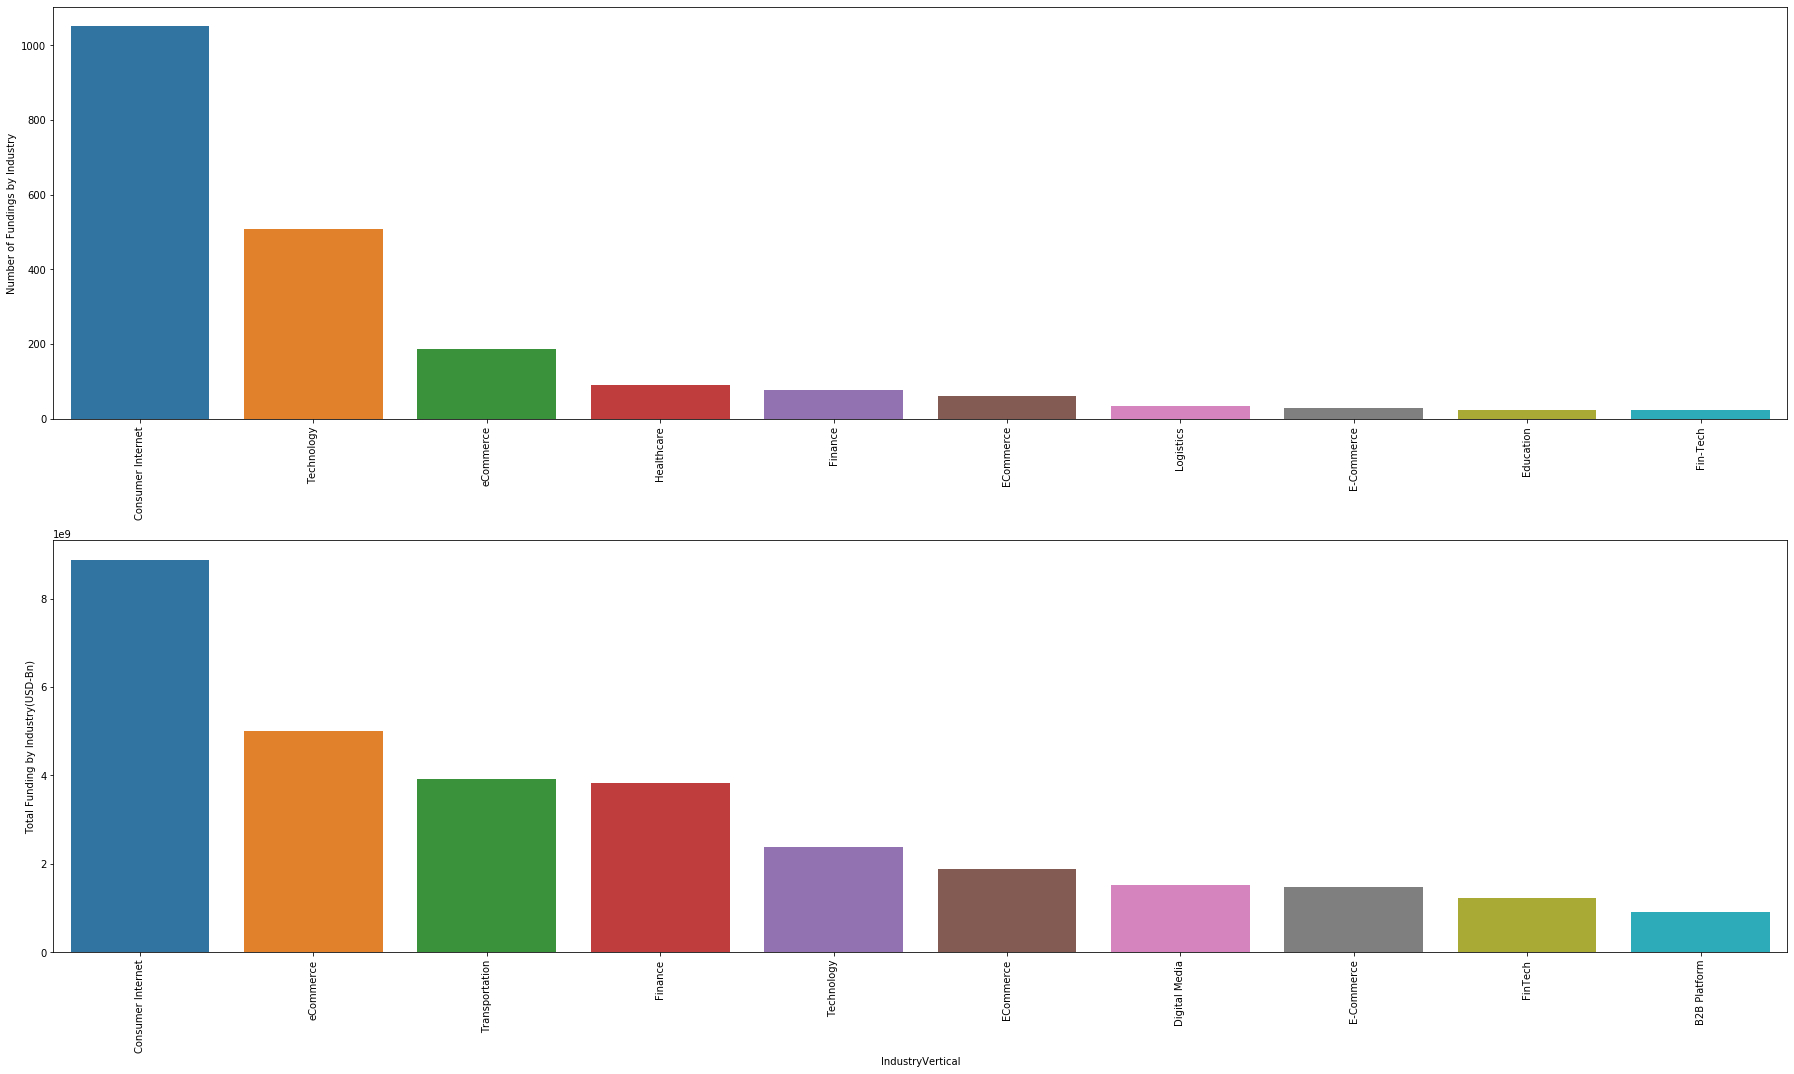

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=fundings_count_industry.index, y=fundings_count_industry['Number of Fundings by Industry'], data=fundings_count_industry, ax=axes[0]).set_xticklabels(rotation=90, labels=fundings_count_industry.index)
sns.barplot(x=funding_total_industry.index, y=funding_total_industry['Total Funding by Industry(USD-Bn)'], data=funding_total_industry, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_industry.index)

fig.tight_layout(pad=1)
#plt.xticks(rotation=90)
plt.show()

### 941 statups have got the fundings for Consumer Internet Industry, that seems perfectly fine as the users cunsumption growing, and we are part of it.¶
-> Contribution in research and projects in Technology, eCommerce and Helthcare has boosted fundings and new automations are coming in to help the cosumers.

-> The total amount of fundings received for eCommerce is 0.87 billion and followed by Consumer Internet(0.6 billion), Trasportation(0.39 billion) and Technology(0.22 Billion)

### Many new startups are coming in the market to serve us like online Jewellery, news aggregation apps, grocery delivery, online pharmacy, educational content provider, electric scooter manufactoring. We are definatly growing and catching up with western world

## D. Who are the important investors in the Indian Ecosystem?

In [34]:
startup_data['InvestorsName']

Date
2015-02-02    At the 10 minute million event
2015-02-02    At the 10 minute million event
2015-02-02    At the 10 minute million event
2015-02-02    At the 10 minute million event
2015-02-02    At the 10 minute million event
                           ...              
2016-05-31                      HT Media Ltd
2016-05-31      NSI Infinium Global Pvt. Ltd
2016-05-31        HBM Healthcare Investments
2016-05-31                      Ashish Gupta
2016-05-31             Undisclosed Investors
Name: InvestorsName, Length: 3255, dtype: object

In [35]:
funding_count_investor = pd.DataFrame(startup_data['InvestorsName'].value_counts()).sort_values(by='InvestorsName', ascending=False)[:10]
funding_count_investor.rename(columns={'InvestorsName': 'Number of Investments by Investor'}, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed Investors'].index, inplace=True)
funding_count_investor.head()

,Number of Investments by Investor
Seed Funding,414
Private Equity,351
Series A,24
Undisclosed investors,22
Indian Angel Network,16


In [36]:
funding_total_investor = pd.DataFrame(startup_data.groupby(['InvestorsName'])['NewAmountUSD'].sum()).sort_values(by="NewAmountUSD", ascending=False)[:15]
funding_total_investor.rename(columns={'NewAmountUSD':'Total Funding by Investor(USD-Bn)'}, inplace=True)
funding_total_investor.head()

,Total Funding by Investor(USD-Bn)
InvestorsName,
Private Equity,7.308642e+09
Westbridge Capital,3.900000e+09
Softbank,2.500000e+09
Undisclosed Investors,2.457224e+09
Qiming Venture Partners,1.510950e+09


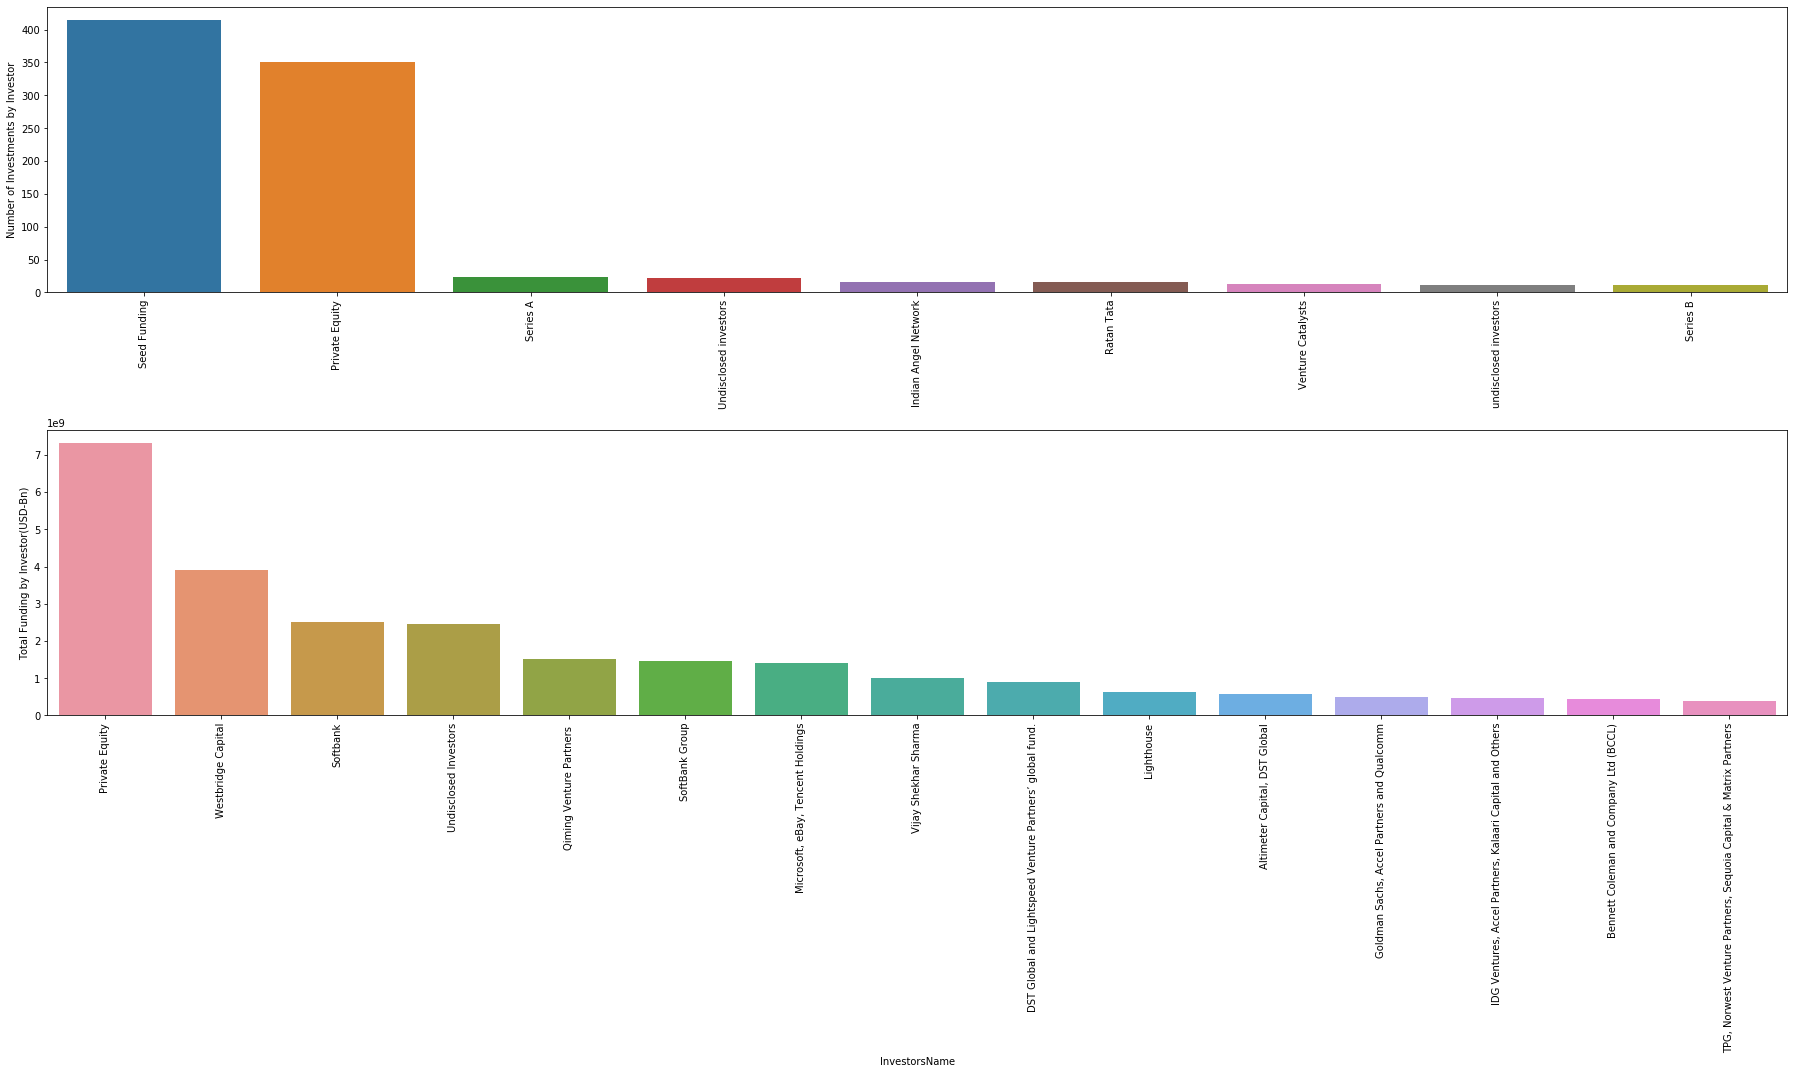

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=funding_count_investor.index, y=funding_count_investor['Number of Investments by Investor'], data=funding_count_investor, ax=axes[0]).set_xticklabels(rotation=90, labels=funding_count_investor.index)
sns.barplot(x=funding_total_investor.index, y=funding_total_investor['Total Funding by Investor(USD-Bn)'], data=funding_total_investor, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_investor.index)

fig.tight_layout(pad=1)
plt.show()

In [38]:
startup_data[startup_data['InvestorsName'].isin(['Westbridge Capital', 'Softbank'])]

,Year,Month,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,NewAmountUSD
Date,,,,,,,,,
2017-11-08,2017,11,Flipkart,eCommerce,Online Marketplace,Bengaluru,Softbank,Private Equity,2.500000e+09
2019-08-27,2019,8,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09


### A one-man venture capital fund is funding Indian startups giving lot of credibility and future.

-> Here in India, **Seed Funding** is majorly used for investments in startups, followed by **Private Equity** then comes to Sir Ratan Tata, Number of startups he has funded are 25 and increasing. This is followed by Indian Angel Network(23), Kalaari Capital(16) etc.

-> Total amount invested 0.39 billion USD by Westbridge Capital is the highest in 'Rapido Bike Taxi' and Softbank has invested 0.29 billion USD in Flipkart

## E. How much funds does startups generally get in India?

In [39]:
funding_count_company = pd.DataFrame(startup_data['StartupName'].value_counts()).sort_values(by='StartupName', ascending=False)[:15]
funding_count_company.rename(columns={'StartupName': 'Number of Investments by Investor'}, inplace=True)
funding_count_company.head()

,Number of Investments by Investor
Nykaa,9
Swiggy,8
Ola Cabs,8
Paytm,7
Udaan,7


In [40]:
funding_total_company = pd.DataFrame(startup_data.groupby('StartupName')['NewAmountUSD'].sum()).sort_values(by='NewAmountUSD', ascending=False)[:15]
funding_total_company.rename(columns={'NewAmountUSD': "Total amount Raised by Startup (USD-Bn)"}, inplace=True)
funding_total_company.head()

,Total amount Raised by Startup (USD-Bn)
StartupName,
Flipkart,4.059700e+09
Rapido Bike Taxi,3.900000e+09
Paytm,3.148950e+09
True North,2.400000e+09
Udaan,1.545000e+09


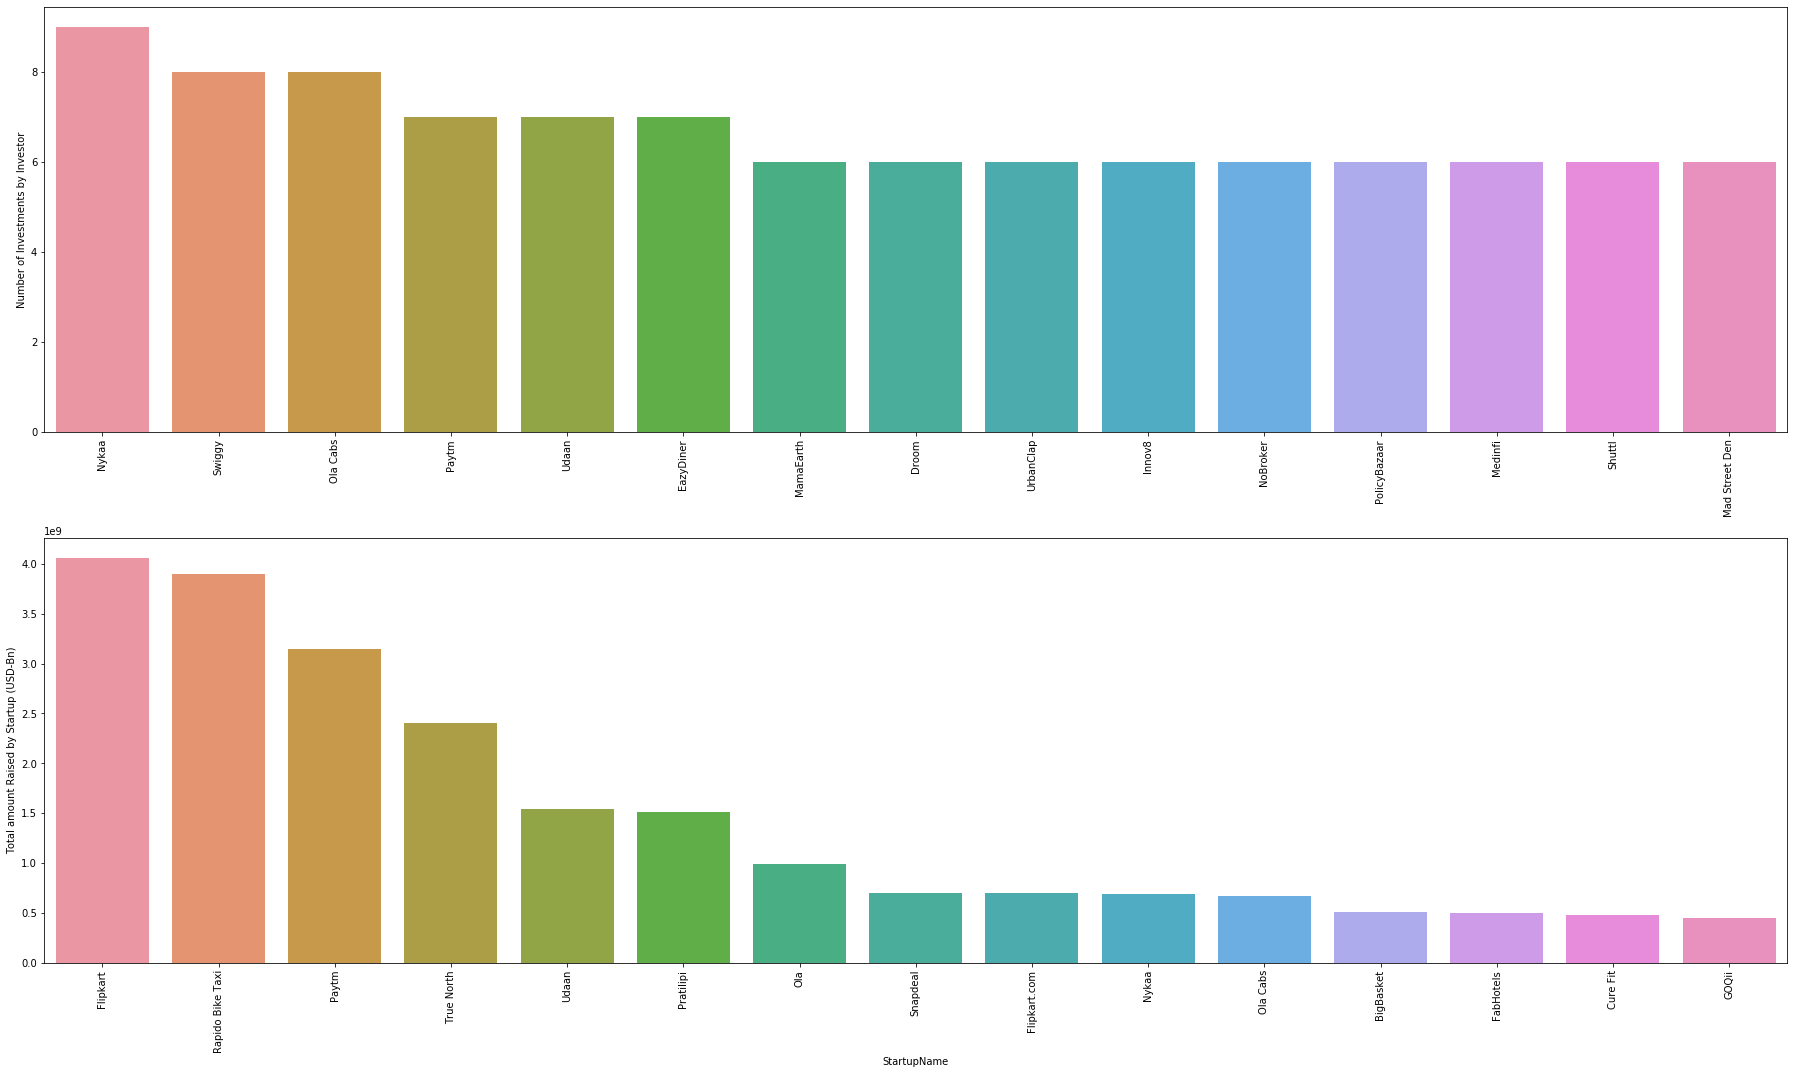

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=funding_count_company.index, y=funding_count_company['Number of Investments by Investor'], data=funding_count_company, ax=axes[0]).set_xticklabels(rotation=90, labels=funding_count_company.index)
sns.barplot(x=funding_total_company.index, y=funding_total_company['Total amount Raised by Startup (USD-Bn)'], data=funding_total_company, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_company.index)

fig.tight_layout(pad=1)
plt.show()

### Swiggy, Ola Cabs, Paytm, Nykaa etc has got lot of fundings these years. This due to their constant innovation in surving cunsumer with AI.
-> Total funding received by Flipkart is highest 0.4 billion USD followed by Rapido Bike Taxi with 0.39 billion USD.

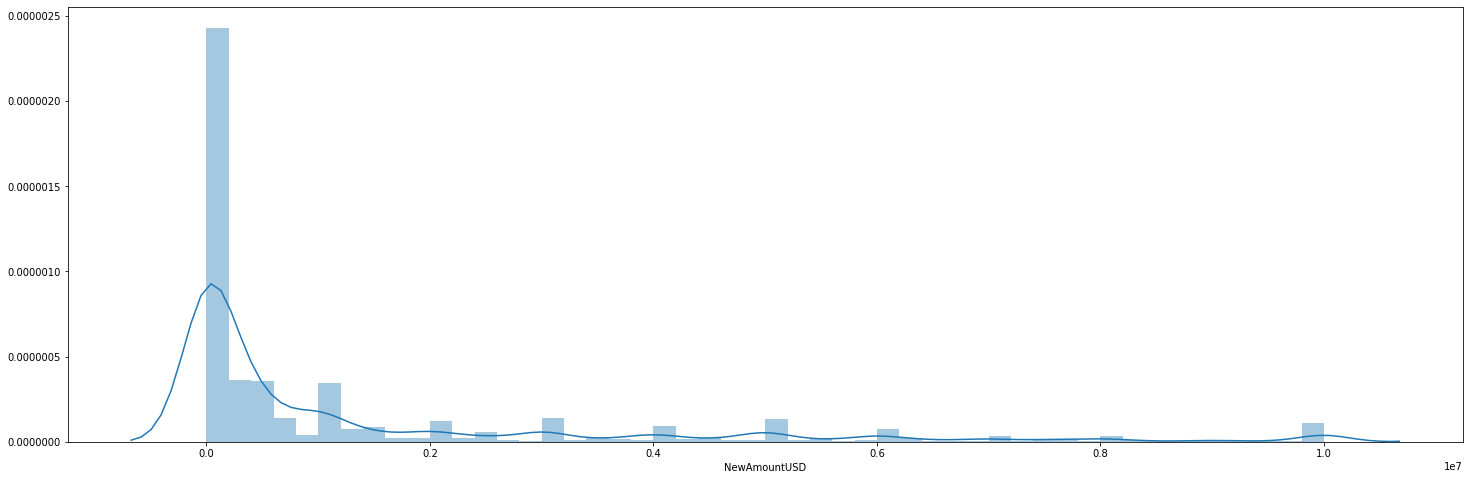

In [42]:
plt.figure(figsize=(25,8))
sns.distplot(startup_data.loc[startup_data['NewAmountUSD']<=10000000.0, 'NewAmountUSD'])
plt.show()

In [43]:
funding_average = startup_data['NewAmountUSD'].mean()
funding_meadian = startup_data['NewAmountUSD'].median()
print("Average :", funding_average)
print("Median :", funding_meadian)

Average : 13585396.783102918
Median : 470000.0


### Average fundings received is 15 million USD and most of the companies get 5 lac. Indian startup market is helping new innovations to come to live and encouraging entrepreneurs.
-> Ending my EDA on this data, got to learn so much about startupd and investor market in India, hope to see more growth in investers.

-> Please give me feedback and suggestions which will help me grow more.

-> I am a data enthusiast and building my career in Data Science. Please give feedback and upvote if you like this article. You can connect with me on LinkedIn (https://www.linkedin.com/in/charulata-shelar-9726984a)

see you soon...